# EDA- czyszczenie i przygotowanie danych

### 1. Import bibliotek

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### 2. Import danych z plikow csv:  `account`, `district`, `trans`
Wskazówka:
- funkcja `read_csv` może automatycznie wywnioskować i załadować plik zip, przeczytaj dokumentację parametru `compression` jeśli jesteś zainteresowany szczegółami
- możesz zignorować ostrzeżenie podczas czytania pliku `trans.csv.zip`. Aby go usunąć, postępuj zgodnie z instrukcjami ostrzegawczymi.

In [136]:
account = pd.read_csv('account.csv')
district = pd.read_csv('district.csv')

In [137]:
trans = pd.read_csv('trans.csv.zip', low_memory = False)

### 3. Zerknij na describe, head kazdego DataFrame

In [138]:
account.describe()

,account_id,district_id,client_id
count,4500.000,4500.000,4500.000
mean,2786.068,37.310,3381.096
std,2313.812,25.177,2839.605
min,1.000,1.000,1.000
25%,1182.750,13.000,1424.750
50%,2368.000,38.000,2861.000
75%,3552.250,60.000,4287.250
max,11382.000,77.000,13998.000


In [139]:
account.head()

,account_id,district_id,frequency,account_open_date,client_id
0,576,55,MONTHLY STATEMENTS,1993-01-01,692
1,3818,74,MONTHLY STATEMENTS,1993-01-01,4601
2,704,55,MONTHLY STATEMENTS,1993-01-01,844
3,2378,16,MONTHLY STATEMENTS,1993-01-01,2873
4,2632,24,MONTHLY STATEMENTS,1993-01-02,3177


In [140]:
district.describe()

,district_id,population,average_salary,unemployment_rate,num_committed_crimes
count,76.000,76.000,66.000,66.000,67.000
mean,38.500,133692.000,8984.379,3.836,5164.567
std,22.083,137812.666,782.234,1.840,12069.629
min,1.000,42821.000,8110.000,0.430,888.000
25%,19.750,84725.000,8441.750,2.455,2081.000
50%,38.500,108391.000,8755.500,3.655,2822.000
75%,57.250,138277.000,9298.250,4.670,4505.000
max,76.000,1204953.000,12541.000,9.400,99107.000


In [141]:
district.head()

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,1,Hl.m. Praha,Prague,1204953,12541.000,0.430,99107.000
1,2,Benesov,central Bohemia,88884,NaN,NaN,2674.000
2,3,Beroun,central Bohemia,75232,8980.000,2.210,2813.000
3,4,Kladno,central Bohemia,149893,9753.000,5.050,NaN
4,5,Kolin,central Bohemia,95616,9307.000,4.430,NaN


In [142]:
trans.describe()

,trans_id,account_id,amount,balance,partner_account
count,1056320.000,1056320.000,1056320.000,1056320.000,295389.000
mean,1335310.704,2936.867,5924.146,38518.331,45670919.375
std,1227486.508,2477.345,9522.735,22117.868,30663396.851
min,1.000,1.000,0.000,-41125.700,0.000
25%,430262.750,1204.000,135.900,22402.500,17828584.000
50%,858506.500,2434.000,2100.000,33143.400,45750951.000
75%,2060979.250,3660.000,6800.000,49603.625,72013407.000
max,3682987.000,11382.000,87400.000,209637.000,99994199.000


In [143]:
trans.head()

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.000,700.000,NaN,NaN,NaN
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.000,900.000,NaN,NaN,NaN
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.000,1000.000,NaN,NaN,NaN
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.000,600.000,NaN,NaN,NaN
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.000,400.000,NaN,NaN,NaN


### 4. Sprawdź unikalne wartości i ich liczbę w każdej kolumnie dla trzech ramek DataFrames

Metoda `.nunique()` zwraca liczbę unikalnych wartości w każdej kolumnie.

In [144]:
account.nunique()

account_id           4500
district_id            77
frequency               3
account_open_date    1535
client_id            4500
dtype: int64

In [145]:
district.nunique()

district_id             76
district_name           76
region                   8
population              76
average_salary          65
unemployment_rate       63
num_committed_crimes    66
dtype: int64

In [146]:
trans.nunique()

trans_id           1056320
account_id            4500
date                  2191
type                     2
operation_type           5
amount               40400
balance             542739
description              8
partner_bank            13
partner_account       7665
dtype: int64

### 5. Sprawdź, czy nie ma duplikatów w trzech ramkach DataFrame

In [147]:
account.duplicated().sum()

0

In [148]:
district.duplicated().sum()

0

In [149]:
trans.duplicated().sum()

0

### 6. Konwertuj kolumnę „account_open_date” w „account” i kolumnę „date” w „trans” na dtypes datetime

In [150]:
account['account_open_date'] = pd.to_datetime(account['account_open_date'], errors='coerce') #jeśli 'coerse' nieprawidłowe parsowania zostaną zamienione na NaT (Not-a-Time)
trans['date'] = pd.to_datetime(trans['date'], errors='coerce')

In [151]:
account.info(), trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   account_id         4500 non-null   int64         
 1   district_id        4500 non-null   int64         
 2   frequency          4500 non-null   object        
 3   account_open_date  4500 non-null   datetime64[ns]
 4   client_id          4500 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 175.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   trans_id         1056320 non-null  int64         
 1   account_id       1056320 non-null  int64         
 2   date             1056320 non-null  datetime64[ns]
 3   type             1056320 non-null  object    

(None, None)

### 7. Zamień kolumny `region` i `district_name` w `district` na tekst, który rozpoczyna się od wielkich liter. 

In [152]:
district['region'] = district['region'].str.title()
district['district_name'] = district['district_name'].str.title()

In [153]:
district[['region', 'district_name']].head()

,region,district_name
0,Prague,Hl.M. Praha
1,Central Bohemia,Benesov
2,Central Bohemia,Beroun
3,Central Bohemia,Kladno
4,Central Bohemia,Kolin


### 8. Sprawdź brakujące dane według kolumn w `account` przy użyciu metody `isna`

In [154]:
account.isna().sum()

account_id           0
district_id          0
frequency            0
account_open_date    0
client_id            0
dtype: int64

### 9. Sprawdź brakujące dane według kolumn w `district` przy użyciu metody `isna`



In [155]:
district.isna().sum()

district_id              0
district_name            0
region                   0
population               0
average_salary          10
unemployment_rate       10
num_committed_crimes     9
dtype: int64

„district” ma brakujące obserwacje. Użyjmy na nich imputacji .

#### Użyj `IterativeImputer` w `sklearn`, aby przypisywać dane na podstawie kolumn `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes`

**Poniższy kod należy wyłącznie wywołać.**


##### Import libraries

In [156]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

##### Zbuduj listę kolumn, które będą używane do imputacji, czyli 'population', 'average_salary', 'unemployment_rate', 'num_committed_crimes'
To są kolumny, które mogą być ze sobą powiązane

In [157]:
cols_to_impute = ['population', 'average_salary', 'unemployment_rate', 'num_committed_crimes']

##### Utwórz obiekt `IterativeImputer` i ustaw jego parametry `min_value` i `max_value` na minimum i maksimum odpowiednich kolumn

In [158]:
iter_imp = IterativeImputer(min_value=district[cols_to_impute].min(), max_value=district[cols_to_impute].max())

##### Zastosuj imputer, aby dopasować i przekształcić kolumny do przypisanej tablicy NumPy

In [159]:
imputed_cols = iter_imp.fit_transform(district[cols_to_impute])

##### Przypisz przypisaną tablicę z powrotem do oryginalnych kolumn DataFrame

In [160]:
district[cols_to_impute] = imputed_cols

##### Dokładnie sprawdź, czy kolumny są przypisane



In [161]:
district.isna().sum()

district_id             0
district_name           0
region                  0
population              0
average_salary          0
unemployment_rate       0
num_committed_crimes    0
dtype: int64

### 10. Sprawdź brakujące dane według kolumn w `trans` używając metody `isna`

In [162]:
trans.isna().sum()

trans_id                0
account_id              0
date                    0
type                    0
operation_type     183114
amount                  0
balance                 0
description        481881
partner_bank       782812
partner_account    760931
dtype: int64

#### Podziel kolumny na kolumny numeryczne i kolumny z kategoriami, a następnie użyj metody `fillna`, aby wypełnić kolumny numeryczne wartością -999, wypełnij kolumny z kategoriami za pomocą 'UNKNOWN'

In [163]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   trans_id         1056320 non-null  int64         
 1   account_id       1056320 non-null  int64         
 2   date             1056320 non-null  datetime64[ns]
 3   type             1056320 non-null  object        
 4   operation_type   873206 non-null   object        
 5   amount           1056320 non-null  float64       
 6   balance          1056320 non-null  float64       
 7   description      574439 non-null   object        
 8   partner_bank     273508 non-null   object        
 9   partner_account  295389 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 80.6+ MB


In [164]:
#wypełnianie brakujących wartości w kolumnie numerycznej
trans['partner_account'] = trans['partner_account'].fillna(-999)

#wypełnianie brakujących wartości w kolumnach kategorycznych
trans['operation_type'] = trans['operation_type'].fillna('UNKNOWN')
trans['description'] = trans['description'].fillna('UNKNOWN')
trans['partner_bank'] = trans['partner_bank'].fillna('UNKNOWN')

In [165]:
trans.isna().sum()

trans_id           0
account_id         0
date               0
type               0
operation_type     0
amount             0
balance            0
description        0
partner_bank       0
partner_account    0
dtype: int64

### 11. Sprawdź wartości odstające w `district` za pomocą metody `describe`, a następnie spójrz na histogramy podejrzanych kolumn

In [166]:
district.describe()

,district_id,population,average_salary,unemployment_rate,num_committed_crimes
count,76.000,76.000,76.000,76.000,76.000
mean,38.500,133692.000,8983.707,3.864,5054.492
std,22.083,137812.666,740.959,1.722,11392.280
min,1.000,42821.000,8110.000,0.430,888.000
25%,19.750,84725.000,8533.750,2.650,1918.455
50%,38.500,108391.000,8792.985,3.762,2864.000
75%,57.250,138277.000,9280.750,4.570,4562.413
max,76.000,1204953.000,12541.000,9.400,99107.000


### "population"  
    
Maksymalna wartość populacji wynosi `1 204 953`, co jest znacznie wyższe niż `75% (138 277)`. To sugeruje potencjalną `wartość odstającą`.

### "unemployment_rate"
    
Maksymalna wartość wynosi `9.4`, co jest znacząco wyższe niż `średnia` i `75%`.

### "num_committed_crimes"
    
Znaczący skok między `75% (4 562.413)` a `maksymalną wartością (99 107)` wskazuje na ekstremalnie dużą `wartość odstającą` w tej kolumnie.

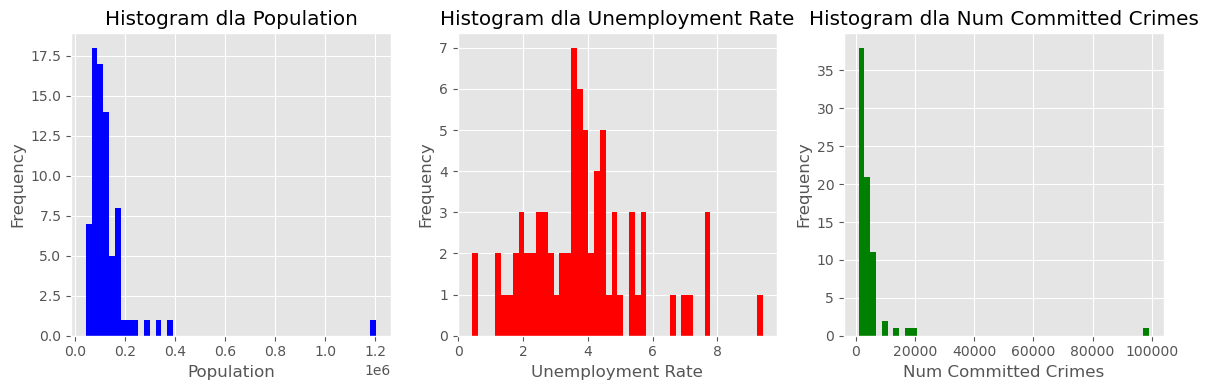

In [167]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 4))

# Histogram dla 'population'
plt.subplot(1, 3, 1)
plt.hist(district['population'], bins=50, color='blue')
plt.title('Histogram dla Population')
plt.xlabel('Population')
plt.ylabel('Frequency')

# Histogram dla 'unemployment_rate'
plt.subplot(1, 3, 2)
plt.hist(district['unemployment_rate'], bins=50, color='red')
plt.title('Histogram dla Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')

# Histogram dla 'num_committed_crimes'
plt.subplot(1, 3, 3)
plt.hist(district['num_committed_crimes'], bins=50, color='green')
plt.title('Histogram dla Num Committed Crimes')
plt.xlabel('Num Committed Crimes')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Za pomoca wykresow przejrzyj outliery. Opisz krótko rozkład danych. 

### Histogram dla Population
Histogram pokazuje wyraźną koncentrację wartości w niższym zakresie, z większością dystryktów mających populację `poniżej 200 000`. Istnieje kilka wartości w zakresie od 200 000 do 400 000 i bardzo wyraźny `outlier powyżej 1 000 000`.

*Wnioski: Wartość odstająca znacznie przewyższa inne i może być wynikiem błędu lub może reprezentować bardzo duży dystrykt. Taka wartość odstająca może wpływać na analizę statystyczną i być przyczyną błędnych wniosków.*

### Histogram dla Unemployment Rate
Rozkład bezrobocia jest bardziej zróżnicowany. Istnieje kilka głównych grup wartości, głównie skoncentrowanych między `2 a 6 procentami`, z kilkoma wartościami przekraczającymi `8 procent`.

*Wnioski: Wyższe wartości bezrobocia mogą wskazywać na regiony z problemami ekonomicznymi lub błędy w danych. Konieczne może być zbadanie przyczyn tak wysokiego bezrobocia w tych dystryktach. Użycie mediany zamiast średniej lub przycinanie skrajnych wartości może być skuteczne, abyzredukować wpływ wartości skrajnych na średnią stawkę bezrobocia.*

### Histogram dla Num Committed Crimes
Większość dystryktów ma stosunkowo niską liczbę przestępstw, poniżej `20 000`. Istnieje jednak kilka wartości odstających, z jednym szczególnie ekstremalnym przypadkiem, gdzie liczba przestępstw przekracza `90 000`.

*Wnioski: Takie ekstremalne wartości mogą wynikać z błędów w danych lub mogą reprezentować specyficzne warunki w tych dystryktach, takie jak duże miasta lub regiony z wysoką przestępczością. Takie wartości odstające mogą znacząco wpłynąć na statystyki krajowe i wymagają dokładnej analizy.*

### Dla każdej z kolumn z wartościami odstającymi warto rozważyć:

- Zbadanie przyczyn na ile to jest możliwe.
- W przypadku stwierdzenia błędów w danych, wartości odstające mogą zostać skorygowane lub usunięte, aby nie wpływały negatywnie na analizę.
- Użycie technik statystycznych, które są odporne na wartości odstające, lub transformacja danych może być rozważana, aby umożliwić bardziej wiarygodne wnioski (Transformacja logarytmiczna, Trimming, Winsoryzacja itp).

### 12. Sprawdź wartości odstające w `trans` za pomocą metody `describe`, a następnie spójrz na histogramy podejrzanych kolumn

In [168]:
trans.describe()

,trans_id,account_id,date,amount,balance,partner_account
count,1056320.000,1056320.000,1056320,1056320.000,1056320.000,1056320.000
mean,1335310.704,2936.867,1997-01-04 07:29:27.037261952,5924.146,38518.331,12770682.211
min,1.000,1.000,1993-01-01 00:00:00,0.000,-41125.700,-999.000
25%,430262.750,1204.000,1996-01-16 00:00:00,135.900,22402.500,-999.000
50%,858506.500,2434.000,1997-04-10 00:00:00,2100.000,33143.400,-999.000
75%,2060979.250,3660.000,1998-02-28 00:00:00,6800.000,49603.625,3410566.000
max,3682987.000,11382.000,1998-12-31 00:00:00,87400.000,209637.000,99994199.000
std,1227486.508,2477.345,NaN,9522.735,22117.868,26136576.178


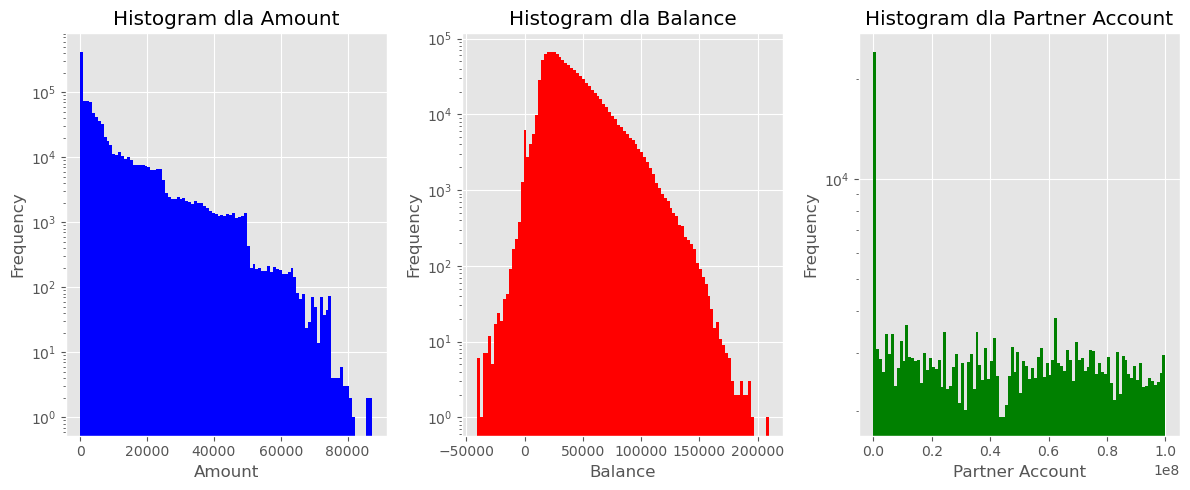

In [169]:
# Ustawienie stylu wykresu
plt.style.use('ggplot')
plt.figure(figsize=(12, 5))

# Histogram dla 'amount'
plt.subplot(1, 3, 1)
plt.hist(trans['amount'], bins=100, color='blue')
plt.title('Histogram dla Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log')  # Logarytmiczna skala Y, aby lepiej zobaczyć rozkład

# Histogram dla 'balance'
plt.subplot(1, 3, 2)
plt.hist(trans['balance'], bins=100, color='red')
plt.title('Histogram dla Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.yscale('log')

# Histogram dla 'partner_account'
plt.subplot(1, 3, 3)
plt.hist(trans[trans['partner_account'] > -999]['partner_account'], bins=100, color='green') # wykluczenie wartości -999 z histogramu
plt.title('Histogram dla Partner Account')
plt.xlabel('Partner Account')
plt.ylabel('Frequency')
plt.yscale('log')

plt.tight_layout()
plt.show()

#### Za pomoca wykresow przejrzyj outliery

### Histogram dla Amount

Rozkład kwot transakcji `Amount` wykazuje ciężki prawy ogon. Większość transakcji ma stosunkowo niską wartość, ale jest też widoczna niewielka liczba transakcji z bardzo wysokimi kwotami, zwłaszcza zbliżającymi się do `87 400`.

*Wnioski: Ostatnie słupki histogramu, które oddzielają się od głównego skupienia, są wartościami odstającymi. Te wartości mogą wpływać na analizy, takie jak obliczanie średnich, i mogą wymagać dalszej analizy lub specjalnego traktowania, na przykład przez przycinanie (trimming) lub stosowanie transformacji logarytmicznej.*

### Histogram dla Balance
`Balance` wykazuje jednolity rozkład z wyraźnymi wartościami odstającymi na obu końcach zakresu, szczególnie na dodatnim końcu, gdzie saldo przekracza `200 000`.

*Wnioski: Bardzo wysokie saldo może wskazywać na duże depozyty lub kumulację środków na koncie, które może być normalne w przypadku pewnych typów kont, ale również może wskazywać na nietypowe lub błędne transakcje.*

### Histogram dla Partner Account (bez wartości -999)

Histogram `Partner Account bez wartości placeholdera -999` prezentuje równomierny rozkład numerów, z wyjątkiem silnego skupienia w najniższym zakresie wartości. Choć większość transakcji koncentruje się na mniejszych numerach kont, to rozkład przez cały zakres jest stosunkowo płaski z kilkoma mniejszymi pikami rozłożonymi równomiernie.

*Wnioski: Równomierny rozkład numerów kont partnerów sugeruje, że nie występują dominujące konta. Brak wyraźnych wartości odstających na wyższym końcu zakresu sugeruje, że nie ma anomalii w formie ekstremalnie dużych numerów kont, które mogłyby wskazywać na błędy lub specyficzne przypadki operacyjne.*

### 13. Scal (złączenie z lewej) `account` i `district` w nową ramkę DataFrame o nazwie `account_district` używając ich wspólnych kolumn.

In [177]:
account_district = pd.merge(account, district, on='district_id', how='left')
account_district.head()

,account_id,district_id,frequency,account_open_date,client_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,576,55,MONTHLY STATEMENTS,1993-01-01,692,Brno - Venkov,South Moravia,157042.000,9072.275,2.430,3894.000
1,3818,74,MONTHLY STATEMENTS,1993-01-01,4601,Ostrava - Mesto,North Moravia,323870.000,10673.000,5.440,18347.000
2,704,55,MONTHLY STATEMENTS,1993-01-01,844,Brno - Venkov,South Moravia,157042.000,9072.275,2.430,3894.000
3,2378,16,MONTHLY STATEMENTS,1993-01-01,2873,Jindrichuv Hradec,South Bohemia,93931.000,8427.000,1.540,1913.000
4,2632,24,MONTHLY STATEMENTS,1993-01-02,3177,Karlovy Vary,West Bohemia,122603.000,8991.000,2.010,5273.000


### 14. Sprawdź podsumowanie informacji o `account_district`, czy brakuje jakichkolwiek danych?

In [178]:
account_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   account_id            4500 non-null   int64         
 1   district_id           4500 non-null   int64         
 2   frequency             4500 non-null   object        
 3   account_open_date     4500 non-null   datetime64[ns]
 4   client_id             4500 non-null   int64         
 5   district_name         4460 non-null   object        
 6   region                4460 non-null   object        
 7   population            4460 non-null   float64       
 8   average_salary        4460 non-null   float64       
 9   unemployment_rate     4460 non-null   float64       
 10  num_committed_crimes  4460 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 386.8+ KB


#### Sprawdz braki danych w  `account_district`

In [179]:
missing_data = account_district.isna().sum()
missing_data

account_id               0
district_id              0
frequency                0
account_open_date        0
client_id                0
district_name           40
region                  40
population              40
average_salary          40
unemployment_rate       40
num_committed_crimes    40
dtype: int64

#### Użyj `SimpleImputer` z `sklearn`, aby przypisać brakujące dane w kolumnach `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes` za pomocą ich średnich

**Zadanie wymaga samodzielnego zerknięcia do dokumentacji biblioteki**

In [180]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')

# Wybranie kolumn do imputacji
columns_to_impute = ['population', 'average_salary', 'unemployment_rate', 'num_committed_crimes']

# Dopasowanie imputera i transformacja danych
imputed_data = imp_mean.fit_transform(account_district[columns_to_impute])

In [181]:
# przypisanie imputowanych wartości
account_district[columns_to_impute] = imputed_data

# Sprawdzenie wyników
account_district.head()

,account_id,district_id,frequency,account_open_date,client_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,576,55,MONTHLY STATEMENTS,1993-01-01,692,Brno - Venkov,South Moravia,157042.000,9072.275,2.430,3894.000
1,3818,74,MONTHLY STATEMENTS,1993-01-01,4601,Ostrava - Mesto,North Moravia,323870.000,10673.000,5.440,18347.000
2,704,55,MONTHLY STATEMENTS,1993-01-01,844,Brno - Venkov,South Moravia,157042.000,9072.275,2.430,3894.000
3,2378,16,MONTHLY STATEMENTS,1993-01-01,2873,Jindrichuv Hradec,South Bohemia,93931.000,8427.000,1.540,1913.000
4,2632,24,MONTHLY STATEMENTS,1993-01-02,3177,Karlovy Vary,West Bohemia,122603.000,8991.000,2.010,5273.000


In [182]:
account_district.isna().sum()

account_id               0
district_id              0
frequency                0
account_open_date        0
client_id                0
district_name           40
region                  40
population               0
average_salary           0
unemployment_rate        0
num_committed_crimes     0
dtype: int64

#### Użyj metody `fillna` do imputowania brakujących danych w kolumnach `district_name` i `region` z 'UNKNOWN'

In [183]:
account_district['district_name'] = account_district['district_name'].fillna('UNKNOWN')
account_district['region'] = account_district['region'].fillna('UNKNOWN')

In [184]:
account_district.isna().sum()

account_id              0
district_id             0
frequency               0
account_open_date       0
client_id               0
district_name           0
region                  0
population              0
average_salary          0
unemployment_rate       0
num_committed_crimes    0
dtype: int64

### 15. Scal (złączenie z lewej) `trans` i `account_district` w nową ramkę DataFrame o nazwie `all_data` używając ich wspólnych kolumn

In [185]:
trans.columns, account_district.columns

(Index(['trans_id', 'account_id', 'date', 'type', 'operation_type', 'amount',
        'balance', 'description', 'partner_bank', 'partner_account'],
       dtype='object'),
 Index(['account_id', 'district_id', 'frequency', 'account_open_date',
        'client_id', 'district_name', 'region', 'population', 'average_salary',
        'unemployment_rate', 'num_committed_crimes'],
       dtype='object'))

In [186]:
all_data = pd.merge(trans, account_district, on='account_id', how='left')

In [187]:
all_data.head()

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account,district_id,frequency,account_open_date,client_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.000,700.000,UNKNOWN,UNKNOWN,-999.000,16,MONTHLY STATEMENTS,1993-01-01,2873,Jindrichuv Hradec,South Bohemia,93931.000,8427.000,1.540,1913.000
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.000,900.000,UNKNOWN,UNKNOWN,-999.000,55,MONTHLY STATEMENTS,1993-01-01,692,Brno - Venkov,South Moravia,157042.000,9072.275,2.430,3894.000
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.000,1000.000,UNKNOWN,UNKNOWN,-999.000,55,MONTHLY STATEMENTS,1993-01-01,844,Brno - Venkov,South Moravia,157042.000,9072.275,2.430,3894.000
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.000,600.000,UNKNOWN,UNKNOWN,-999.000,74,MONTHLY STATEMENTS,1993-01-01,4601,Ostrava - Mesto,North Moravia,323870.000,10673.000,5.440,18347.000
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.000,400.000,UNKNOWN,UNKNOWN,-999.000,77,MONTHLY STATEMENTS,1993-01-02,2397,UNKNOWN,UNKNOWN,270325.692,9482.018,3.572,16486.171


#### Sprawdz dane z uzyciem summary dla `all_data`

In [191]:
# Wyświetlenie informacji o df 'all_data'
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   trans_id              1056320 non-null  int64         
 1   account_id            1056320 non-null  int64         
 2   date                  1056320 non-null  datetime64[ns]
 3   type                  1056320 non-null  object        
 4   operation_type        1056320 non-null  object        
 5   amount                1056320 non-null  float64       
 6   balance               1056320 non-null  float64       
 7   description           1056320 non-null  object        
 8   partner_bank          1056320 non-null  object        
 9   partner_account       1056320 non-null  float64       
 10  district_id           1056320 non-null  int64         
 11  frequency             1056320 non-null  object        
 12  account_open_date     1056320 non-null  da

In [192]:
# Wyświetlenie statystyk opisowych
all_data.describe()

,trans_id,account_id,date,amount,balance,partner_account,district_id,account_open_date,client_id,population,average_salary,unemployment_rate,num_committed_crimes
count,1056320.000,1056320.000,1056320,1056320.000,1056320.000,1056320.000,1056320.000,1056320,1056320.000,1056320.000,1056320.000,1056320.000,1056320.000
mean,1335310.704,2936.867,1997-01-04 07:29:27.037261952,5924.146,38518.331,12770682.211,37.428,1994-11-15 21:10:28.255074176,3567.453,273538.657,9499.940,3.581,16756.603
min,1.000,1.000,1993-01-01 00:00:00,0.000,-41125.700,-999.000,1.000,1993-01-01 00:00:00,1.000,42821.000,8110.000,0.430,888.000
25%,430262.750,1204.000,1996-01-16 00:00:00,135.900,22402.500,-999.000,13.000,1993-07-28 00:00:00,1453.000,92084.000,8561.000,2.070,2218.000
50%,858506.500,2434.000,1997-04-10 00:00:00,2100.000,33143.400,-999.000,38.000,1994-07-25 00:00:00,2940.000,122603.000,8980.000,3.670,3891.000
75%,2060979.250,3660.000,1998-02-28 00:00:00,6800.000,49603.625,3410566.000,61.000,1996-03-09 00:00:00,4413.000,226122.000,9945.418,4.720,9208.000
max,3682987.000,11382.000,1998-12-31 00:00:00,87400.000,209637.000,99994199.000,77.000,1997-12-29 00:00:00,13998.000,1204953.000,12541.000,9.400,99107.000
std,1227486.508,2477.345,NaN,9522.735,22117.868,26136576.178,25.353,NaN,3043.797,360731.752,1317.812,1.993,31498.789


In [193]:
# Sprawdzenie brakujących danych w każdej kolumnie(widać też w .info())
all_data.isna().sum()

trans_id                0
account_id              0
date                    0
type                    0
operation_type          0
amount                  0
balance                 0
description             0
partner_bank            0
partner_account         0
district_id             0
frequency               0
account_open_date       0
client_id               0
district_name           0
region                  0
population              0
average_salary          0
unemployment_rate       0
num_committed_crimes    0
dtype: int64

### 16. Utwórz nową kolumnę `account_open_year` i przypisz ją jako rok z kolumny `account_open_date`

In [196]:
all_data['account_open_year'] = all_data['account_open_date'].dt.year

In [204]:
all_data[['account_open_date', 'account_open_year']].tail()

,account_open_date,account_open_year
1056315,1996-09-20,1996
1056316,1995-05-15,1995
1056317,1996-09-27,1996
1056318,1993-09-09,1993
1056319,1993-01-28,1993


### 17. Wyeksportuj zbiór danych w csv i podeślij go wraz z .ipynb

(wystarczy część rekordów, jeśli plik będzie za duży do przesłania) 

In [205]:
all_data.to_csv('all_data_export.csv', index=False)

In [206]:
all_data.head(3000).to_csv('all_data_first_3000.csv', index=False)

##### Zadanie domowe wykonane dzięki nadzorowaniu przez mojego kota, który sprawdził każdy bit danych! Oto dowód, że nauka może być zabawna. 😸

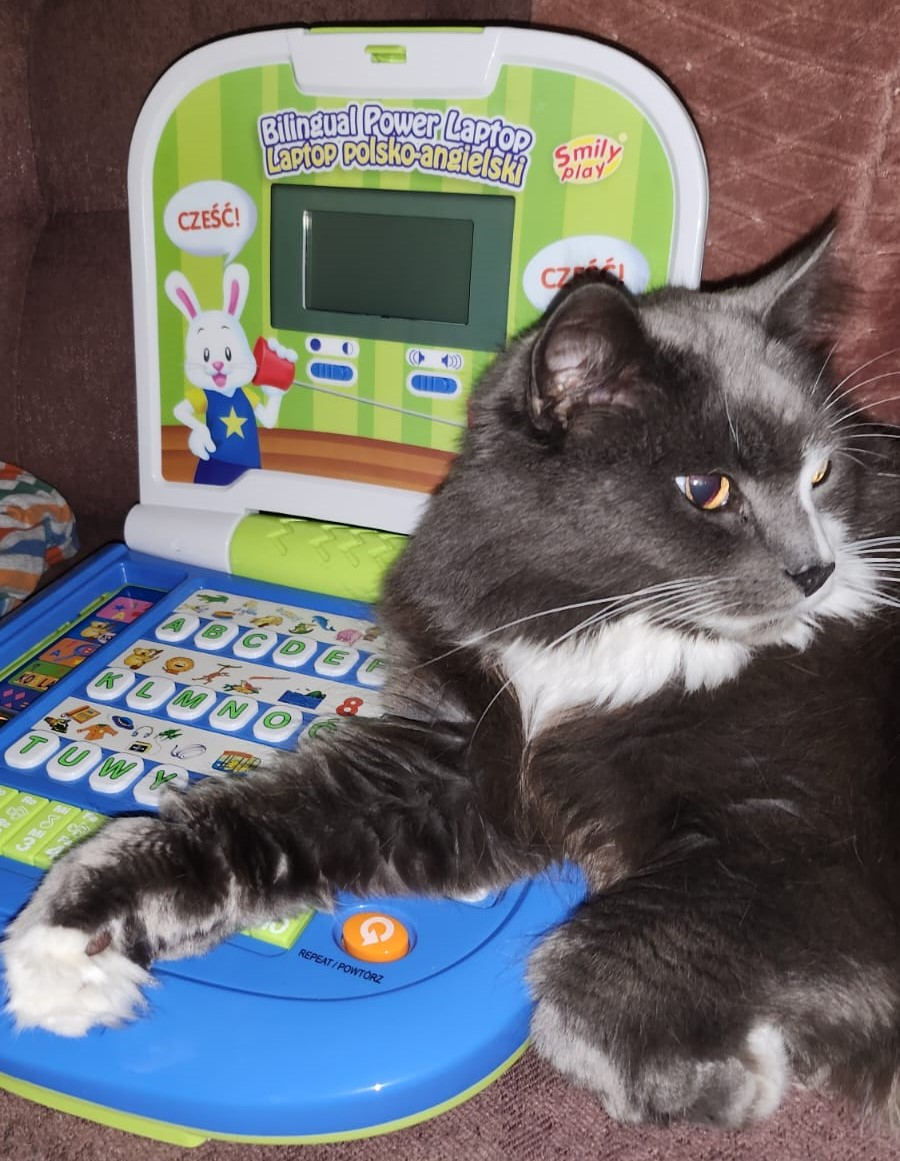